In [3]:
import pandas as pd 
bitcoin=pd.read_csv("/Users/karthikragulan/Desktop/TIMESERIES/Time Series Analysis/Exponential Smoothing and Holt Winters/bitcoin_price.csv")

In [38]:
import matplotlib.pyplot as plt
!pip install statsmodels
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [22]:
customer=pd.read_csv("/Users/karthikragulan/Desktop/TIMESERIES/Time Series Analysis/Exponential Smoothing and Holt Winters/weekly_customer_complaints.csv",index_col="week",parse_dates=True)

In [23]:
customer.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [9]:
#information about the dataframe

In [26]:
customer['complaints']=customer['complaints'].str.replace(',','').astype(float)

In [27]:
customer.asfreq("W-Mon")

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0
...,...,...,...,...,...
2022-11-28,4444.0,29.89%,0,1,0
2022-12-05,4920.0,28.48%,1,0,0
2022-12-12,5342.0,28.89%,0,0,0


In [24]:
#EDA

<Axes: title={'center': 'Weekly Compaints'}, xlabel='week'>

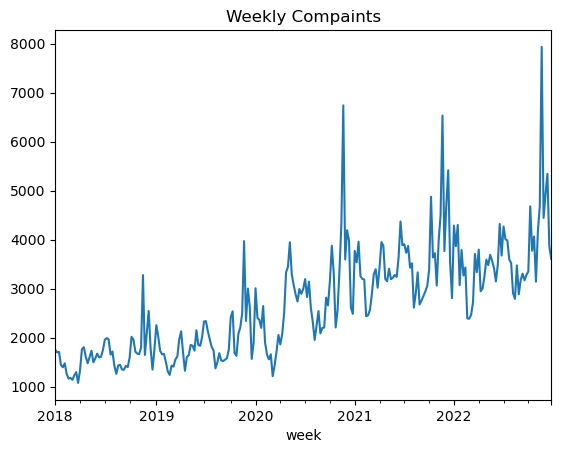

In [29]:
df=customer.copy()
df["complaints"].plot(title="Weekly Compaints")

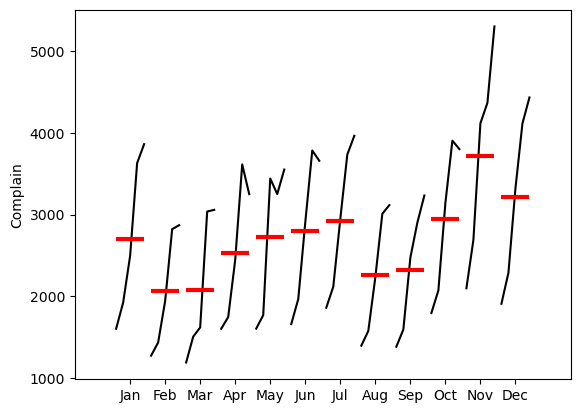

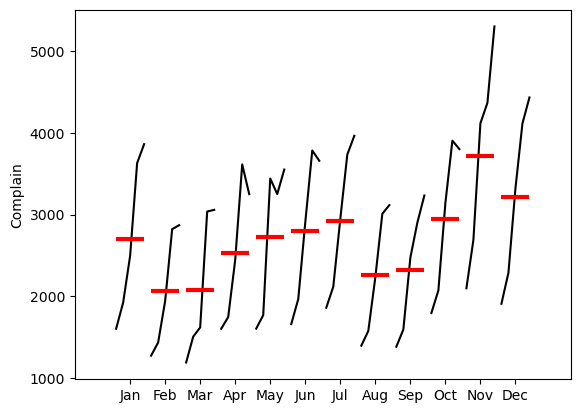

In [39]:
month_plot(df["complaints"].resample("ME").mean(),
           ylabel="Complain")

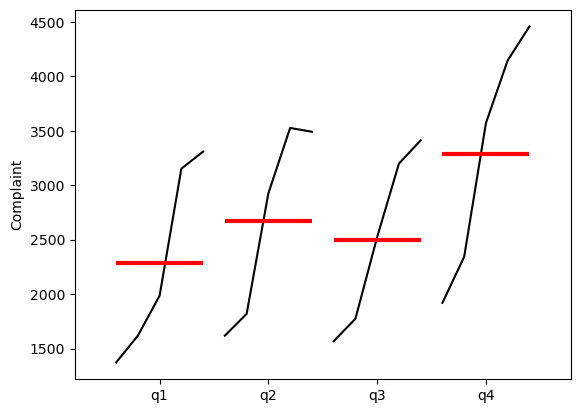

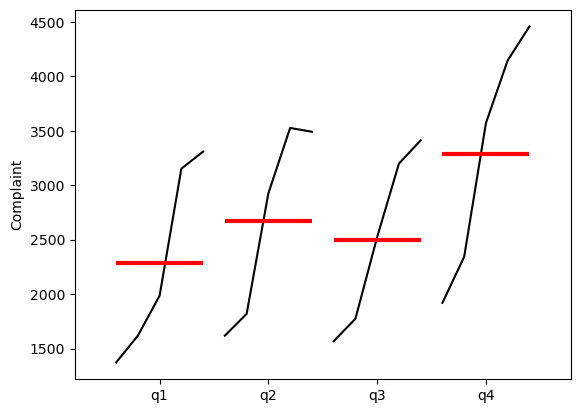

In [42]:
quarter_plot(df["complaints"].resample("QE").mean(),
             ylabel="Complaint")

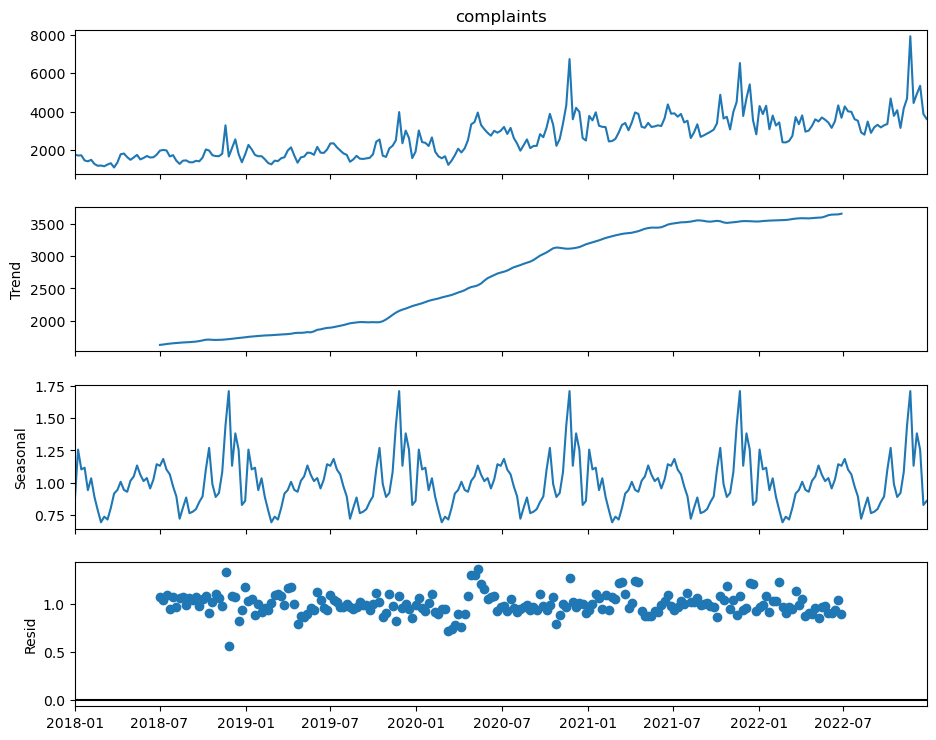

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df["complaints"]
                             ,model="multiplicative"
                             ,period=52)
fig=decompose.plot()
fig.set_size_inches(10,8)
plt.show()

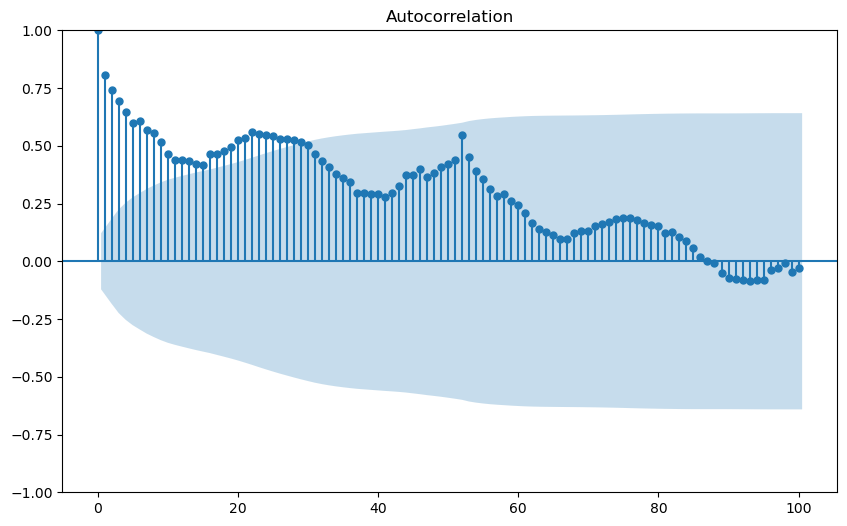

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax=plt.subplots(figsize=(10,6))
plot_acf(df["complaints"],lags=100,ax=ax)
plt.show()

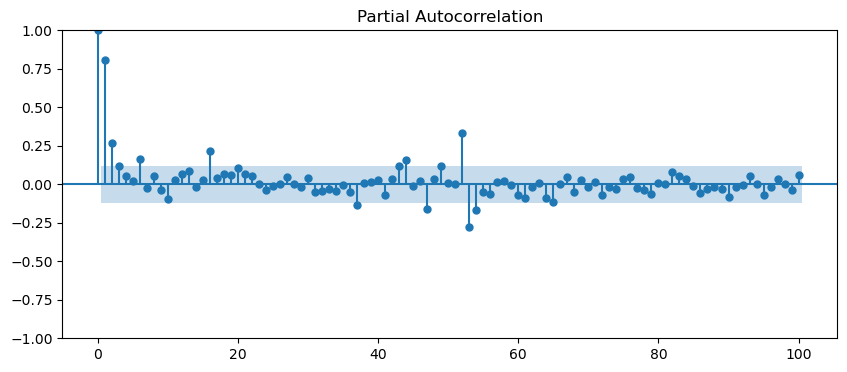

In [48]:
fig,ax=plt.subplots(figsize=(10,4))
plot_pacf(df["complaints"],lags=100,ax=ax)
plt.show()

In [52]:
#training and testing split
periods=13
train,test=df.iloc[:-periods,0],df.iloc[-periods:,0]

In [65]:
#simple exponential smoothening
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

In [58]:
model_simple=SimpleExpSmoothing(train).fit()
pred=model_simple.forecast(len(test))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


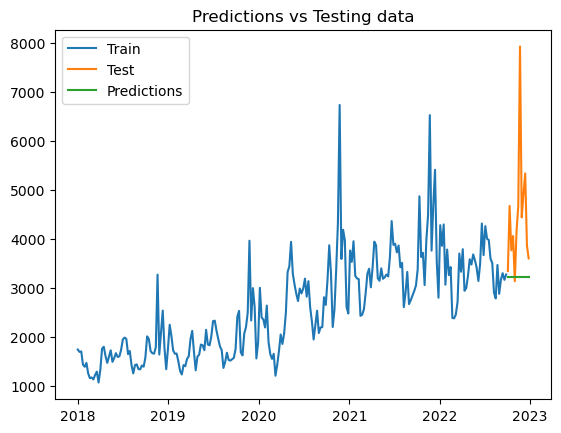

In [64]:
#plotting the forecast
plt.title("Predictions vs Testing data")
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(pred,label="Predictions")
plt.legend()
plt.show()

In [70]:
model_exp=ExponentialSmoothing(train,trend="additive",seasonal="mul",seasonal_periods=52).fit()
pred=model_exp.forecast(len(test))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


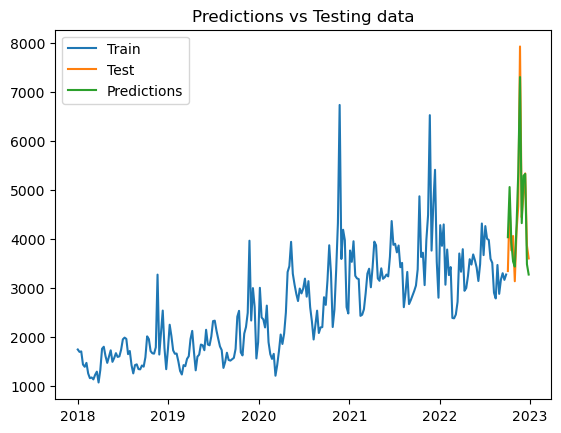

In [71]:
#plotting the forecast
plt.title("Predictions vs Testing data")
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(pred,label="Predictions")
plt.legend()
plt.show()